In [1]:
import numpy as np
import json

In [2]:
import rasterio
from rasterio.plot import show
fp = 'Fuel_Vegetation_Cover_CONUS.tif'
img = rasterio.open(fp)
# show(img)

In [3]:
print(img.crs)

EPSG:5070


In [4]:
affine = img.transform
affine

Affine(30.0, 0.0, -2362395.000000001,
       0.0, -30.0, 3267405.0000000037)

In [5]:
imarray = img.read(1)
imarray.size

15873943230

In [9]:
from pyproj import Transformer
transformer = Transformer.from_crs("epsg:5070", "epsg:4326")#Change to 32610 which is the salo epsg
transformer.transform(affine[2], affine[5])

(48.751523450250666, -128.3869052521)

In [185]:
origin = affine * (0, 0)
end = affine * (len(imarray[0]), len(imarray))
origin, end

((-2362395.000000001, 3267405.0000000037),
 (2327654.999999999, 221265.00000000373))

In [184]:
ori_lat_long_coords = transformer.transform(origin[0], origin[1])
end_lat_long_coords = transformer.transform(end[0], end[1])
ori_lat_long_coords, end_lat_long_coords

((48.751523450250666, -128.3869052521),
 (22.503620023791562, -73.63564467897385))

In [ ]:
#((37.48908544352257, -122.20127766290896),
# (36.888272429602885, -121.21243727715039))

In [ ]:
#((-2265846.2014394025, 1919911.179234505),
 #(-2200042.216985933, 1831798.4959051241))

In [14]:
imarray.shape

(101538, 156335)

In [141]:
test = affine * (3218, 44916)
print(test, transformer.transform(test[0], test[1]))

(-2265855.000000001, 1919925.0000000037) (37.48918273648383, -122.20141728528925)


In [150]:
test2 = affine * (5412, 47854)
print(test2, transformer.transform(test2[0], test2[1]))

(-2200035.000000001, 1831785.0000000037) (36.88817308005652, -121.2123183188361)


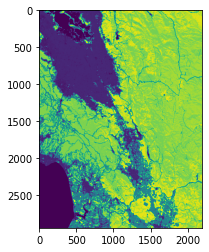

<AxesSubplot:>

In [180]:
portion = imarray[44916:47854]
new_arr = []
for i in range(len(portion)):
    new_arr.append(portion[i][3218:5412])
show(new_arr)

In [181]:
new_arr = np.array(new_arr)

In [179]:
new_arr.shape

(2938, 2194)

In [8]:
# from pyproj import Transformer
# transformer = Transformer.from_crs("epsg:32610", "epsg:4326")#Change to 32610 which is the salo epsg
# transformer.transform(648490.0, 4377880.0)

(39.53775311661699, -121.27206566921241)

In [168]:
origin = affine * (0, 0)
end = affine * (len(imarray[0]), len(imarray))
origin, end

((-2362395.000000001, 3267405.0000000037),
 (2327654.999999999, 221265.00000000373))

In [169]:
img.bounds

BoundingBox(left=-2362395.000000001, bottom=221265.00000000373, right=2327654.999999999, top=3267405.0000000037)

In [196]:
d = {}
i = 44916
while i < len(new_arr) + 44916:
    j = 3218
    while j < len(new_arr[0]) + 3218:
        epsg_coords = affine * (j, i)
        x = epsg_coords[0]
        y = epsg_coords[1]
        (latitude, longitude) = transformer.transform(x, y)
        d[str(latitude) + ", " + str(longitude)] = imarray[i][j]
        j += 1
    i += 1
    if (i - 44916) % (len(new_arr) // 100) == 0:
        print(str(int((i-44915) / len(new_arr) * 100)) + "%")

1%
2%
2%
3%
4%
5%
6%
7%
8%
9%
10%
11%
12%
13%
14%
15%
16%
17%
18%
19%
20%
21%
22%
23%
24%
25%
26%
27%
28%
29%
30%
31%
32%
33%
34%
35%
36%
37%
38%
39%
40%
41%
42%
43%
44%
45%
46%
47%
48%
49%
50%
51%
52%
53%
54%
55%
56%
57%
58%
59%
60%
61%
62%
63%
64%
65%
66%
67%
68%
69%
70%
71%
72%
73%
74%
75%
76%
77%
78%
78%
79%
80%
81%
82%
83%
84%
85%
86%
87%
88%
89%
90%
91%
92%
93%
94%
95%
96%
97%
98%
99%


In [ ]:
# 6,445,972

In [197]:
len(d)

6445972

In [ ]:
# d = {}
# i = 0
# while i < int(len(imarray) / 2):
#     j = 0
#     epsg_coords = affine * (2 * j + 0.5, 2 * i + 0.5)
#     lat_long_coords = transformer.transform(epsg_coords[0], epsg_coords[1])
#     latitude = lat_long_coordas[0]
# #     latitude = topmost - i * 2 * delta_lat - 0.5 * delta_lat
#     row1 = imarray[2 * i]
#     row2 = imarray[2 * i + 1]
    
#     while j < int(len(imarray[0]) / 2):
#         epsg_coords = affine * (2 * j + 0.5, 2 * i + 0.5)
#         lat_long_coords = transformer.transform(epsg_coords[0], epsg_coords[1])
#         longitude = lat_long_coords[1]
# #         longitude = leftmost + j * 2 * delta_long + 0.5 * delta_long
#         d[str(latitude) + ", " + str(longitude)] = (row1[2 * j] + row1[2 * j + 1] + row2[2 * j] + row2[2 * j + 1]) / 4
#         j += 1
#     if j < len(imarray[0]) / 2:
#         epsg_coords = affine * (2 * j + 0.5, 2 * i + 0.5)
#         lat_long_coords = transformer.transform(epsg_coords[0], epsg_coords[1])
#         longitude = lat_long_coords[1]
#         d[str(latitude) + ", " + str(longitude)] = (row1[2 * j] + row2[2 * j]) / 2
#     i += 1
#     if i % (len(imarray) // 100) == 0:
#         print(str(int(i / len(imarray) * 200)) + "%")
# if i < len(imarray) / 2:
#     j = 0
#     epsg_coords = affine * (2 * j + 0.5, 2 * i + 0.5)
#     lat_long_coords = transformer.transform(epsg_coords[0], epsg_coords[1])
#     latitude = lat_long_coords[0]
#     while j < int(len(imarray[0]) / 2):
#         epsg_coords = affine * (2 * j + 0.5, 2 * i + 0.5)
#         lat_long_coords = transformer.transform(epsg_coords[0], epsg_coords[1])
#         longitude = lat_long_coords[1]
#         d[str(latitude) + ", " + str(longitude)] = (row1[2 * j] + row1[2 * j + 1] + row2[2 * j] + row2[2 * j + 1]) / 4
#         j += 1
#     if j < len(imarray[0]) / 2:
#         epsg_coords = affine * (2 * j + 0.5, 2 * i + 0.5)
#         lat_long_coords = transformer.transform(epsg_coords[0], epsg_coords[1])
#         longitude = lat_long_coords[1]
#         d[str(latitude) + ", " + str(longitude)] = (row1[2 * j] + row2[2 * j]) / 2

In [198]:
len(d.keys())

6445972

In [199]:
d_key_list = list(d.keys())

In [200]:
d_key_list[860000]

'37.542577422809366, -121.45710890058366'

In [201]:
rightmost = -150
leftmost = 0
topmost = 20
bottommost = 80

In [202]:
for coord in d_key_list:
    lat = float(coord.split(", ")[0])
    long = float(coord.split(", ")[1])
    if long < leftmost:
        leftmost = long
    if long > rightmost:
        rightmost = long
    if lat > topmost:
        topmost = lat
    if lat < bottommost:
        bottommost = lat

In [203]:
rightmost, leftmost, topmost, bottommost

(-121.21273530228194,
 -122.20141728528925,
 37.64683690948743,
 36.73225442280849)

In [209]:
d[d_key_list[860000]]

103

In [210]:
import pickle
pickle_out = open("SantaClaraLandFireFuelLongLat.pickle", "wb")
pickle.dump(d, pickle_out)
pickle_out.close()

In [ ]:
d_key_list[0]

In [ ]:
d[d_key_list[0]]